# **TP HPO : Hyperparameter Optimization in Deep Learning**

License : CC BY-NC-SA 4.0

## **Initial Setup and Instructions**
This section prepares the notebook environment for our exercises and introduces key tools we'll use throughout.


### Auto-Reloading

To ensure any changes in imported modules are automatically updated in the notebook, we enable auto-reloading. This is particularly useful during development, as it saves time that would otherwise be spent restarting the kernel.


In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Understanding `ToDo`

Throughout this notebook, you'll encounter placeholders marked with `ToDo`. This indicates a section where you, the student, need to complete or modify the code. The `ToDo` class is designed to remind you of tasks that need to be addressed to proceed with the exercises. It's a prompt for active participation in the learning process.

Whenever you see a `ToDo` in the code, it's your cue to engage with the material by writing or modifying code. This interactive approach helps reinforce learning through practice.

In [21]:
class ToDo:
    def __init__(self, message=None):
        if message is None:
            self.message = "This part of the code needs to be completed by the student."
        else:
            self.message = message

    def __call__(self, *args, **kwargs):
        print("TODO: Complete this part of the code.")
        raise NotImplementedError(self.message)

    # Example of an additional method that could be useful in the future
    def hint(self):
        print(f"Hint: {self.message}")

# Usage
todo = ToDo()

## **Introduction to Hyperparameter Optimization**

Hyperparameter Optimization (HPO) is a critical process in developing deep learning models. It involves finding the most effective combination of hyperparameters, which are the configuration settings used to structure the learning process of a model. Unlike model parameters, which are learned during training, hyperparameters are set prior to the learning process and can significantly impact the performance of the model.

### Goals of HPO
- **Maximize Performance**: Optimize model accuracy, precision, recall, or any other relevant metric.
- **Efficiency**: Reduce training time and computational resources without compromising performance.
- **Generalization**: Enhance the model's ability to perform well on unseen data.


## Overview of HPO Frameworks

In the realm of machine learning and deep learning, several frameworks are available for hyperparameter optimization (HPO). Each of these frameworks offers unique features and capabilities. Among the most notable are Optuna, Ray Tune, Hyperopt, and Scikit-Optimize. However, in this notebook, we will primarily focus on Optuna and Ray Tune due to their specific advantages and relevance in different scenarios.

### Optuna

- **Overview**: Optuna is a versatile and user-friendly open-source optimization framework specifically tailored for machine learning. Known for its efficiency and ease of use, Optuna is particularly well-suited for individuals and teams starting their journey with HPO. 
- **Why We Focus on Optuna**: We choose Optuna for its intuitive API, efficient optimization algorithms, and excellent visualization capabilities, making it ideal for educational purposes and straightforward HPO tasks.
- [Optuna Website](https://optuna.org/)

### Ray Tune

- **Overview**: Ray Tune is a powerful component of the Ray ecosystem, designed for distributed hyperparameter tuning. It is especially useful for handling large-scale, computationally intensive HPO tasks.
- **Why Ray Tune is an Interesting Choice**: We include Ray Tune due to its scalability, ability to leverage distributed computing resources effectively, and integration with various machine learning frameworks, making it suitable for more advanced, large-scale HPO scenarios.
- [Ray Tune Website](https://docs.ray.io/en/latest/tune/)

### Other Notable Frameworks

- **Hyperopt**: A popular tool for optimizing over awkward search spaces with real-valued, discrete, and conditional dimensions. [Hyperopt Website](http://hyperopt.github.io/hyperopt/)
- **Scikit-Optimize**: A library for sequential model-based optimization that is built on top of Scikit-Learn. It's particularly straightforward for those already familiar with the Scikit-Learn ecosystem. [Scikit-Optimize Website](https://scikit-optimize.github.io/stable/)

While there are other excellent frameworks available, Optuna and Ray Tune stand out for their distinct advantages in specific use cases. Optuna's user-friendly nature makes it an excellent teaching tool for understanding the basics and intricacies of HPO, while Ray Tune's scalability and advanced features make it a robust choice for tackling more complex, resource-intensive HPO tasks.



## Installing the Frameworks

Before diving into practical examples, you may need to install Optuna and Ray Tune. These libraries can be easily installed using pip. However, they might already be installed in your environment, especially if you are using a pre-configured setup like Google Colab or a managed Jupyter environment.

To check if these libraries are already installed, you can import them in your notebook. If they are not installed, you can install them using the following pip commands:

In [22]:
try:
    import optuna
    print("Optuna is already installed.")
except ImportError:
    print("Optuna is not installed.")

try:
    import ray.tune
    print("Ray Tune is already installed.")
except ImportError:
    print("Ray Tune is not installed.")

Optuna is already installed.
Ray Tune is already installed.


### Installing Optuna and Ray Tune

If you find that Optuna or Ray Tune is not installed, you can install them using the following commands:



Remember to restart the kernel of your Jupyter notebook after installing the libraries to ensure that the changes take effect.

```bash
# To install Optuna
!pip install optuna --user

# To install Ray Tune
!pip install ray[tune] --user
```

---
---
---
## **Synthetic Optimization with a Simple Function**

To grasp the fundamentals of hyperparameter optimization (HPO) without the complexity of training models, we'll start with a synthetic example. This approach involves a straightforward function that simulates loss based on two hyperparameters and a mode—either 'simple' or 'complex'. This synthetic function facilitates exploration of the HPO process efficiently.

### Setting Up the Simulation

Our goal with the `synthetic_loss_function` is to explore how different combinations of hyperparameters affect the loss, depending on the mode of operation. This function demonstrates the impact of hyperparameters on a model's loss landscape in a simplified manner.

### Implementing the Synthetic Loss Function

The task involves implementing a single `synthetic_loss_function` capable of operating in two distinct modes. This design allows us to examine different types of loss landscapes: one straightforward with a single minimum and another more intricate with multiple minima.

> **Task**: Implement the `synthetic_loss_function` that behaves differently based on the `mode` parameter:
- For `mode='simple'`, calculate the loss with a single minimum when parameters are 1 and 2:
  $$\text{loss} = (hyperparam1 - 1)^2 + (hyperparam2 - 2)^2$$
  
- For `mode='complex'`, calculate the loss featuring multiple minima and a more dynamic landscape:
  $$\text{loss} = \sin(hyperparam1) \cdot (hyperparam1 - 2)^2 + \sin(hyperparam2) \cdot (hyperparam2 - 2)^2$$

In [23]:
import numpy as np

def synthetic_loss_function(hyperparam1, hyperparam2, mode='simple'):
    # Implementation based on mode
    if mode == 'simple':
        # TODO: Calculate the loss for the simple mode
        return todo()
    elif mode == 'complex':
        # TODO: Calculate the loss for the complex mode
        return todo()
    else:
        raise ValueError("Invalid mode specified. Choose either 'simple' or 'complex'.")

In [24]:

def synthetic_loss_function(hyperparam1, hyperparam2, mode='simple'):
    if mode == 'simple':
        # Solution for the simple mode
        return (hyperparam1 - 1)**2 + (hyperparam2 - 2)**2
    elif mode == 'complex':
        # Solution for the complex mode
        return np.sin(hyperparam1) * (hyperparam1 - 2)**2 + np.sin(hyperparam2) * (hyperparam2 - 2)**2
    else:
        raise ValueError("Invalid mode specified. Choose either 'simple' or 'complex'.")



<details>
<summary>Solution (click to reveal)</summary>
Here's the completed `synthetic_loss_function`:

```python
def synthetic_loss_function(hyperparam1, hyperparam2, mode='simple'):
    if mode == 'simple':
        # Solution for the simple mode
        return (hyperparam1 - 1)**2 + (hyperparam2 - 2)**2
    elif mode == 'complex':
        # Solution for the complex mode
        return np.sin(hyperparam1) * (hyperparam1 - 2)**2 + np.sin(hyperparam2) * (hyperparam2 - 2)**2
    else:
        raise ValueError("Invalid mode specified. Choose either 'simple' or 'complex'.")
```
</details>


### Visualizing a Synthetic Loss Landscape

In practice, the loss landscape of deep learning models is intricate and high-dimensional, making direct visualization challenging. For this exercise, we simplify the concept by using a synthetic loss function. This visualization serves as a conceptual tool to illustrate the effects of hyperparameter adjustments on model performance, rather than a practical approach to navigating real-world loss landscapes.

This simplified exercise aims to provide insight into the optimization process in a visual and intuitive manner.

> **Task**: Generate a meshgrid for parameter values and use `synthetic_loss_function` to calculate the loss. Then, create a contour plot to visualize the loss landscape. Ensure the range for parameters is broad enough to effectively visualize the landscapes for both modes.


> **Task**: Apply the `synthetic_loss_function` to calculate the loss across the meshgrid for both 'simple' and 'complex' modes.



In [25]:
import numpy as np

# Define the range for both parameters using np.linspace and that accommodates both 'simple' and 'complex' modes
hyperparam1_range = todo()
hyperparam2_range = todo()


# Create a meshgrid for the parameter values
hyperparam1, hyperparam2 =  todo()

# Calculate the loss for each combination of param1 and param2 for both modes
# Hint: Use the synthetic_loss_function you defined earlier with 'simple' and 'complex' modes
loss_simple = todo()
loss_complex = todo()

TODO: Complete this part of the code.


NotImplementedError: This part of the code needs to be completed by the student.

In [26]:
import numpy as np

# Define the range for both parameters using np.linspace and that accommodates both 'simple' and 'complex' modes
hyperparam1_range = np.linspace(-3, 3, 50)
hyperparam2_range = np.linspace(-3, 3, 50)


# Create a meshgrid for the parameter values
hyperparam1, hyperparam2= np.meshgrid(hyperparam1_range, hyperparam2_range)

# Calculate the loss for each combination of param1 and param2 for both modes
# Hint: Use the synthetic_loss_function you defined earlier with 'simple' and 'complex' modes
loss_simple = synthetic_loss_function(hyperparam1, hyperparam2, mode='simple')
loss_complex = synthetic_loss_function(hyperparam1, hyperparam2, mode='complex')


<details>
<summary>Solution (click to reveal)</summary>

```python
import numpy as np

# Define the range for both parameters using np.linspace and that accommodates both 'simple' and 'complex' modes
hyperparam1_range = np.linspace(-3, 3, 50)
hyperparam2_range = np.linspace(-3, 3, 50)


# Create a meshgrid for the parameter values
hyperparam1, hyperparam2= np.meshgrid(hyperparam1_range, hyperparam2_range)

# Calculate the loss for each combination of param1 and param2 for both modes
# Hint: Use the synthetic_loss_function you defined earlier with 'simple' and 'complex' modes
loss_simple = synthetic_loss_function(hyperparam1, hyperparam2, mode='simple')
loss_complex = synthetic_loss_function(hyperparam1, hyperparam2, mode='complex')
```
</details>

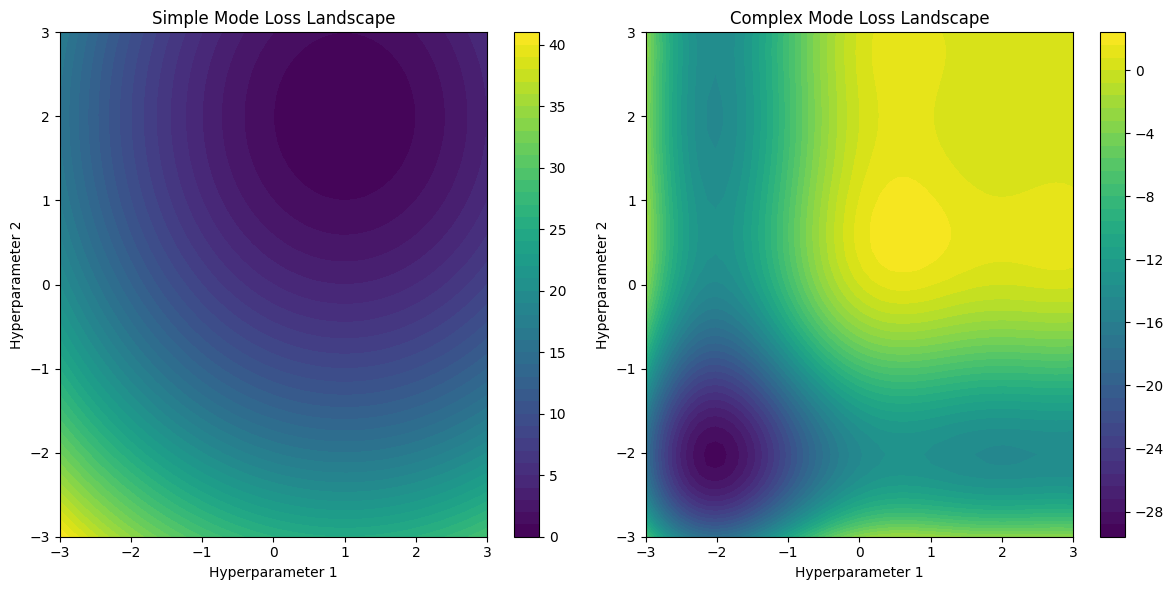

In [27]:
import matplotlib.pyplot as plt

# Plotting the loss landscape for 'simple' mode
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(hyperparam1, hyperparam2, loss_simple, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Simple Mode Loss Landscape')
plt.xlabel('Hyperparameter 1')
plt.ylabel('Hyperparameter 2')

# Plotting the loss landscape for 'complex' mode
plt.subplot(1, 2, 2)
plt.contourf(hyperparam1, hyperparam2, loss_complex, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Complex Mode Loss Landscape')
plt.xlabel('Hyperparameter 1')
plt.ylabel('Hyperparameter 2')

plt.tight_layout()
plt.show()


---
---
---
## **Hyperparameter Optimization Techniques with Optuna**

Hyperparameter Optimization (HPO) plays a crucial role in enhancing the performance of machine learning models by efficiently finding the best set of hyperparameters. It bridges the gap between theoretical understanding and practical application, moving beyond trial-and-error to systematic and automated search strategies. Optuna stands out in the HPO landscape, offering a user-friendly interface and efficient algorithms for exploring complex hyperparameter spaces. Its versatility makes it suitable for a wide range of applications, from tuning simple models to optimizing sophisticated deep learning architectures.

### Define the Objective Function

The cornerstone of using Optuna for HPO is the objective function. This function evaluates how well a set of hyperparameters performs against a predefined metric, typically the loss or accuracy of a model. Within Optuna, a `trial` object suggests hyperparameters, allowing the objective function to be dynamically adjusted based on the trial's performance. 

> **Task**: Implement an `objective` function for Optuna, designed to work with both 'simple' and 'complex' modes of a synthetic loss function. This entails defining hyperparameter ranges suitable for both modes and incorporating a mode selector. Utilize Optuna's `suggest_float` for continuous hyperparameters and `suggest_categorical` for selecting the operational mode. This exercise will introduce you to defining hyperparameter spaces and optimizing them within the Optuna framework. For detailed guidance, consult the documentation for [`suggest_float`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html#optuna.trial.Trial.suggest_float) and [`suggest_categorical`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html#optuna.trial.Trial.suggest_categorical).


In [28]:
import optuna

def objective(trial):
    # Use trial.suggest_float for hyperparam1. Think about the appropriate range.
    hyperparam1 = todo()
    
    # Use trial.suggest_float for hyperparam2. Consider what range might be best.
    hyperparam2 = todo()
    
    # Use trial.suggest_categorical to choose between 'simple' and 'complex' modes.
    mode = todo()
    
    return synthetic_loss_function(hyperparam1, hyperparam2, mode)


In [29]:
import optuna

def objective(trial):
    # Suggest values for the hyperparameters with suitable ranges for both modes
    hyperparam1 = trial.suggest_float("hyperparam1", -3, 3)
    hyperparam2 = trial.suggest_float("hyperparam2", -3, 3)
    
    # Include a mode switch: 'simple' or 'complex'
    mode = trial.suggest_categorical("mode", ["simple", "complex"])
    
    # Return the loss from the synthetic_loss_function
    return synthetic_loss_function(hyperparam1, hyperparam2, mode)



<details>
<summary>Solution (click to reveal)</summary>

```python
import optuna

def objective(trial):
    # Suggest values for the hyperparameters with suitable ranges for both modes
    hyperparam1 = trial.suggest_float("hyperparam1", -3, 3)
    hyperparam2 = trial.suggest_float("hyperparam2", -3, 3)
    
    # Include a mode switch: 'simple' or 'complex'
    mode = trial.suggest_categorical("mode", ["simple", "complex"])
    
    # Return the loss from the synthetic_loss_function
    return synthetic_loss_function(hyperparam1, hyperparam2, mode)
```
</details>

### Exploring Optimization Strategies with Optuna

Optuna supports a variety of hyperparameter optimization strategies, each offering distinct advantages. This section will guide you through the creation and optimization of studies using three key strategies: Grid Search, Bayesian Optimization (TPE), and Random Sampling.

#### Grid Search
> **Task**: Initialize an Optuna study with the [`GridSampler`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.samplers.GridSampler.html) to perform an exhaustive search over a predefined grid of hyperparameter values. This method is thorough, ensuring no potential combination is overlooked, though it may be computationally demanding.

#### Random Sampling
> **Task**: Utilize the [`RandomSampler`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.samplers.RandomSampler.html) for a stochastic exploration of the hyperparameter space. Random Sampling provides a baseline by selecting hyperparameters without prior assumptions, offering a chance to identify good parameters early in less complex spaces.

#### Bayesian Optimization (TPE)
> **Task**: Employ the default [`TPESampler`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.samplers.TPESampler.html) for Bayesian Optimization. This approach uses a probabilistic model to intelligently propose hyperparameter sets, optimizing in complex, high-dimensional spaces efficiently.

For each strategy:
- **Setting Up the Study**: Create an Optuna study specifying the chosen sampler. This setup defines the optimization strategy for your hyperparameter search.
  
- **Running the Optimization**: Optimize your study by invoking the `optimize` method with your objective function. The number of trials can be adjusted to balance thorough exploration with computational resource constraints.

- **Analyzing the Results**: Upon completion, use `study.best_params` to review the most effective hyperparameters identified through each strategy, providing insights into their performance and suitability for your specific problem.

This exploration provides a hands-on comparison of different optimization strategies within Optuna, demonstrating their utility and effectiveness across a range of optimization scenarios.

In [30]:
import logging

import optuna
from optuna.samplers import TPESampler, GridSampler, RandomSampler

# Adjust Optuna's logging level to WARN to reduce output verbosity
logging.getLogger("optuna").setLevel(logging.WARNING)

# Search space for Grid Search
grid_search_space = {
    'hyperparam1': [-3, -1, 0, 1, 3],
    'hyperparam2': [-3, -1, 0, 1, 3],
    'mode': ['simple', 'complex']
}

# Initialize studies with different samplers
grid_study = optuna.create_study(direction='minimize', sampler=GridSampler(grid_search_space), study_name='GridSearchStudy')
random_study = todo()  # Initialize Random Sampling study
tpe_study = todo()  # Initialize TPE study

# Specify the number of trials
n_trials = todo()

# Optimize the studies
grid_study.optimize(objective, n_trials=n_trials)
todo()  # Optimize Random Sampling study
todo()  # Optimize TPE study

# Print the best parameters found by each study
print(f"Grid Search Best parameters found: {grid_study.best_params}")
todo()  # Print best parameters for Random Sampling study
todo()  # Print best parameters for TPE study

TODO: Complete this part of the code.


NotImplementedError: This part of the code needs to be completed by the student.

In [32]:
import logging
import optuna
from optuna.samplers import TPESampler, GridSampler, RandomSampler

# Adjust Optuna's logging level to WARN to reduce output verbosity
logging.getLogger("optuna").setLevel(logging.WARNING)

# Assuming 'objective' is defined elsewhere in your notebook
# Example objective function
def objective(trial):
    hyperparam1 = trial.suggest_float("hyperparam1", -3, 3)
    hyperparam2 = trial.suggest_float("hyperparam2", -3, 3)
    mode = trial.suggest_categorical("mode", ["simple", "complex"])
    # Example evaluation logic
    return (hyperparam1 - 1)**2 + (hyperparam2 - 2)**2

# Search space for Grid Search
grid_search_space = {
    'hyperparam1': [-3, -1, 0, 1, 3],
    'hyperparam2': [-3, -1, 0, 1, 3],
    'mode': ['simple', 'complex']
}

# Initialize studies with different samplers
grid_study = optuna.create_study(direction='minimize', sampler=GridSampler(grid_search_space), study_name='GridSearchStudy')
random_study = optuna.create_study(direction='minimize', sampler=RandomSampler(), study_name='RandomSamplerStudy')
tpe_study = optuna.create_study(direction='minimize', sampler=TPESampler(), study_name='TPESamplerStudy')

# Number of trials
n_trials = 100  # Specify the number of trials for demonstration

# Optimize the studies
grid_study.optimize(objective, n_trials=n_trials)
random_study.optimize(objective, n_trials=n_trials)
tpe_study.optimize(objective, n_trials=n_trials)

# Print the best parameters found by each study
print(f"Grid Search Best parameters found: {grid_study.best_params}")
print(f"Random Sampling Best parameters found: {random_study.best_params}")
print(f"TPE Best parameters found: {tpe_study.best_params}")

Grid Search Best parameters found: {'hyperparam1': 1.0, 'hyperparam2': 3.0, 'mode': 'complex'}
Random Sampling Best parameters found: {'hyperparam1': 1.1348137207524953, 'hyperparam2': 2.09860205417099, 'mode': 'complex'}
TPE Best parameters found: {'hyperparam1': 1.0249280849599516, 'hyperparam2': 1.945277804934908, 'mode': 'complex'}


In [33]:
import logging
import optuna
from optuna.samplers import TPESampler, GridSampler, RandomSampler
from tqdm import tqdm

# Adjust Optuna's logging level to reduce output verbosity
logging.getLogger("optuna").setLevel(logging.WARNING)

# Search space for Grid Search
grid_search_space = {
    'hyperparam1': [-3, -1, 0, 1, 3],
    'hyperparam2': [-3, -1, 0, 1, 3],
    'mode': ['simple', 'complex']
}

# Initialize studies with different samplers
grid_study = optuna.create_study(direction='minimize', sampler=GridSampler(grid_search_space), study_name='GridSearchStudy')
tpe_study = optuna.create_study(direction='minimize', sampler=TPESampler(), study_name='TPESamplerStudy')
random_study = optuna.create_study(direction='minimize', sampler=RandomSampler(), study_name='RandomSamplerStudy')

# Define a callback for the progress bar update
def progress_bar_callback(study, trial):
    pbar.update(1)

# Number of trials
n_trials = 100

# Initialize tqdm progress bar for each study and optimize
for study in [grid_study, tpe_study, random_study]:
    with tqdm(total=n_trials, desc=f"Optimizing {study.study_name}", unit="trial") as pbar:
        study.optimize(objective, n_trials=n_trials, callbacks=[progress_bar_callback])
        pbar.close()  # Ensure the progress bar is closed after optimization

    # Print the best parameters found by each study
    print(f"{study.study_name} Best parameters found: {study.best_params}")

Optimizing GridSearchStudy:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 50/100 [00:00<00:00, 1141.52trial/s]


GridSearchStudy Best parameters found: {'hyperparam1': 1.0, 'hyperparam2': 3.0, 'mode': 'complex'}


Optimizing TPESamplerStudy: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 141.62trial/s]


TPESamplerStudy Best parameters found: {'hyperparam1': 1.0001606346436065, 'hyperparam2': 1.9175453410105208, 'mode': 'complex'}


Optimizing RandomSamplerStudy: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 4185.22trial/s]

RandomSamplerStudy Best parameters found: {'hyperparam1': 1.3615118918104727, 'hyperparam2': 2.2348720093592256, 'mode': 'simple'}


<details>
<summary>Basic Solution (click to reveal)</summary>

This basic solution focuses on setting up and running the optimization without additional libraries for progress tracking.

```python
import optuna
from optuna.samplers import TPESampler, GridSampler, RandomSampler

# Adjust Optuna's logging level to WARN to reduce output verbosity
logging.getLogger("optuna").setLevel(logging.WARNING)

# Assuming 'objective' is defined elsewhere in your notebook
# Example objective function
def objective(trial):
    hyperparam1 = trial.suggest_float("hyperparam1", -3, 3)
    hyperparam2 = trial.suggest_float("hyperparam2", -3, 3)
    mode = trial.suggest_categorical("mode", ["simple", "complex"])
    # Example evaluation logic
    return (hyperparam1 - 1)**2 + (hyperparam2 - 2)**2

# Search space for Grid Search
grid_search_space = {
    'hyperparam1': [-3, -1, 0, 1, 3],
    'hyperparam2': [-3, -1, 0, 1, 3],
    'mode': ['simple', 'complex']
}

# Initialize studies with different samplers
grid_study = optuna.create_study(direction='minimize', sampler=GridSampler(grid_search_space), study_name='GridSearchStudy')
tpe_study = optuna.create_study(direction='minimize', sampler=TPESampler(), study_name='TPESamplerStudy')
random_study = optuna.create_study(direction='minimize', sampler=RandomSampler(), study_name='RandomSamplerStudy')

# Number of trials
n_trials = 100  # Specify the number of trials for demonstration

# Optimize the studies
grid_study.optimize(objective, n_trials=n_trials)
tpe_study.optimize(objective, n_trials=n_trials)
random_study.optimize(objective, n_trials=n_trials)

# Print the best parameters found by each study
print(f"Grid Search Best parameters found: {grid_study.best_params}")
print(f"TPE Best parameters found: {tpe_study.best_params}")
print(f"Random Sampling Best parameters found: {random_study.best_params}")
```

</details>

<details>
<summary>Advanced Solution with Progress Bar and less print (click to reveal)</summary>

This advanced solution incorporates `tqdm` for progress tracking, providing visual feedback during the optimization process.

```python
import logging
import optuna
from optuna.samplers import TPESampler, GridSampler, RandomSampler
from tqdm import tqdm

# Adjust Optuna's logging level to reduce output verbosity
logging.getLogger("optuna").setLevel(logging.WARNING)

# Search space for Grid Search
grid_search_space = {
    'hyperparam1': [-3, -1, 0, 1, 3],
    'hyperparam2': [-3, -1, 0, 1, 3],
    'mode': ['simple', 'complex']
}

# Initialize studies with different samplers
grid_study = optuna.create_study(direction='minimize', sampler=GridSampler(grid_search_space), study_name='GridSearchStudy')
tpe_study = optuna.create_study(direction='minimize', sampler=TPESampler(), study_name='TPESamplerStudy')
random_study = optuna.create_study(direction='minimize', sampler=RandomSampler(), study_name='RandomSamplerStudy')

# Define a callback for the progress bar update
def progress_bar_callback(study, trial):
    pbar.update(1)

# Number of trials
n_trials = 50

# Initialize tqdm progress bar for each study and optimize
for study in [grid_study, tpe_study, random_study]:
    with tqdm(total=n_trials, desc=f"Optimizing {study.study_name}", unit="trial") as pbar:
        study.optimize(objective, n_trials=n_trials, callbacks=[progress_bar_callback])
        pbar.close()  # Ensure the progress bar is closed after optimization

    # Print the best parameters found by each study
    print(f"{study.study_name} Best parameters found: {study.best_params}")
```

</details>

---
---
### Visualizing Comparisons of Optimization Strategies with Optuna

Optuna's visualization module provides a comprehensive toolkit for analyzing the outcomes of hyperparameter optimization experiments. These visual tools offer deep insights into the performance and dynamics of different optimization strategies, including Grid Search, TPE (Bayesian Optimization), and Random Sampling, highlighting the nuances of each approach in navigating the hyperparameter space.

- **[`plot_parallel_coordinate`](https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_parallel_coordinate.html)**: Illustrates the interplay between hyperparameters and objective values, useful for comparing the influence of parameters across optimization strategies.

- **[`plot_optimization_history`](https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_optimization_history.html)**: Chronicles the progression of objective value improvements across trials, offering insights into the efficiency and exploration depth of each strategy.

- **[`plot_param_importances`](https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_param_importances.html)**: Highlights which hyperparameters significantly impact the objective value, aiding in strategy refinement for future optimizations.

- **[`plot_contour`](https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_contour.html)**: Explores the synergy between pairs of hyperparameters and their collective effect on the objective, facilitating the identification of optimal parameter interactions.

- **[`plot_edf`](https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_edf.html)**: Displays the empirical distribution of objective values across all trials, providing a macroscopic view of the optimization landscape influenced by different sampling strategies.

- **[`plot_intermediate_values`](https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_intermediate_values.html)**: Reveals the trajectory of intermediate objective values, shedding light on the iterative progress within trials.

- **[`plot_slice`](https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_slice.html)**: Demystifies how variations in individual hyperparameters impact the objective, highlighting parameter sensitivity.

- **[`plot_timeline`](https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_timeline.html)**: Visualizes the timeline of trial execution, underscoring the operational efficiency and parallelization capabilities of each strategy.

- **[`plot_rank`](https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_rank.html)**: Assesses the comparative performance of trials, accentuating the effectiveness of different optimization strategies.

> **Task**: Examine the visualizations to discern the distinct characteristics and efficacy of Grid Search, TPE, and Random Sampling strategies. Utilize insights from plots like hyperparameter importance and optimization history to devise nuanced future tuning approaches and enhance model optimization outcomes.


In [34]:
from IPython.display import display, HTML
import optuna.visualization as vis
from plotly.io import to_html
import matplotlib.pyplot as plt

def display_optuna_visualizations(study):
    """
    Display a series of Optuna visualization plots for a given study.

    Parameters:
    - study: The Optuna study to visualize.
    """
    # List of visualization functions to display, with a brief description as a comment
    visualization_functions = [
        vis.plot_parallel_coordinate,  # Hyperparameter Relationship Plot
        vis.plot_optimization_history,  # Optimization History
        vis.plot_param_importances,  # Hyperparameter Importance
        vis.plot_contour,  # Contour Plot of Parameter Interactions
        vis.plot_edf,  # EDF (Empirical Distribution Function)
        vis.plot_intermediate_values,  # Intermediate Values of All Trials
        vis.plot_slice,  # Slice Plot in a Study
        vis.plot_timeline,  # Timeline of a Study
        vis.plot_rank  # Rank Plot
    ]

    # Generate and display each visualization
    for vis_func in visualization_functions:
        #fig = vis_func(study)
        display(HTML(to_html(vis_func(study), full_html=False, include_plotlyjs='cdn')))

#### Grid search results

In [35]:
display_optuna_visualizations(grid_study)

[W 2024-02-06 17:55:36,697] You need to set up the pruning feature to utilize `plot_intermediate_values()`


/tmp/ipykernel_1431456/4150697996.py:29: ExperimentalWarning:

plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.



/tmp/ipykernel_1431456/4150697996.py:29: ExperimentalWarning:

plot_rank is experimental (supported from v3.2.0). The interface can change in the future.



#### Random search results

In [14]:
display_optuna_visualizations(random_study)

[W 2024-02-06 17:41:14,029] You need to set up the pruning feature to utilize `plot_intermediate_values()`


/tmp/ipykernel_1431456/4150697996.py:29: ExperimentalWarning:

plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.



/tmp/ipykernel_1431456/4150697996.py:29: ExperimentalWarning:

plot_rank is experimental (supported from v3.2.0). The interface can change in the future.



#### TPE search results

In [15]:
display_optuna_visualizations(tpe_study)

[W 2024-02-06 17:41:15,530] You need to set up the pruning feature to utilize `plot_intermediate_values()`


/tmp/ipykernel_1431456/4150697996.py:29: ExperimentalWarning:

plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.



/tmp/ipykernel_1431456/4150697996.py:29: ExperimentalWarning:

plot_rank is experimental (supported from v3.2.0). The interface can change in the future.



---
---
### Leveraging Optuna Pruners for Efficient Optimization

Optuna pruners enhance optimization by terminating unpromising trials early, conserving valuable computational resources. Among various pruners, the `SuccessiveHalvingPruner` exemplifies efficiency by applying the Asynchronous Successive Halving Algorithm (ASHA).

#### Pruners in Action

- **[`SuccessiveHalvingPruner`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.SuccessiveHalvingPruner.html)**: This pruner evaluates trials at intervals, halving less promising ones, focusing resources on those with the most potential.

#### Objective Function Adjustments for Pruning

To utilize pruning:
- **Intermediate Reporting**: The objective function must periodically report interim results using `trial.report()`.
- **Checkpoints for Pruning**: Incorporate `trial.should_prune()` checks after reporting, halting trials early with `optuna.TrialPruned()` if deemed non-promising.

#### Why Adapt Our Synthetic Function

Adjusting our synthetic function to report intermediate results allows pruners to make informed decisions on trial continuation. This step is crucial for pruning to effectively reduce computational load and improve the optimization process's overall efficiency.

Pruning with Optuna signifies a strategic layer to hyperparameter optimization, ensuring a smarter allocation of computational effort towards the most promising trials.

> **Note**: Effective use of pruners like `SuccessiveHalvingPruner` necessitates modifications for intermediate evaluations within the objective function, enabling a dynamic and resource-efficient optimization workflow.

In [16]:
def objective_with_pruning(trial):
    # Define hyperparameters
    hyperparam1 = trial.suggest_float("hyperparam1", -6, 6)
    hyperparam2 = trial.suggest_float("hyperparam2", -6, 6)
    mode = trial.suggest_categorical("mode", ["simple", "complex"])
    
    # Simulate a step-wise evaluation process
    accumulated_loss = 0
    steps = 10  # Number of evaluation steps
    for step in range(1, steps + 1):
        # Simulated loss calculation (example: a modified Rosenbrock function)
        intermediate_loss = (1 - hyperparam1)**2 + 100 * (hyperparam2 - hyperparam1**2)**2 + step
        accumulated_loss += intermediate_loss
        
        # Report intermediate objective value
        trial.report(accumulated_loss, step)
        
        # Handle pruning based on the intermediate value
        if trial.should_prune():
            raise optuna.TrialPruned()
    
    return accumulated_loss / steps  # Return the average loss

> **Task**: Create and optimize an Optuna study with the [`SuccessiveHalvingPruner`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.SuccessiveHalvingPruner.html). Initialize the study to minimize the objective, using `objective_with_pruning`. Observe the pruning effect on trial completions and optimization efficiency. Analyze the best parameters found. Refer to Optuna's documentation on [creating a study](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.create_study.html) and [optimizing it](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.study.Study.html#optuna.study.Study.optimize) for guidance.

In [17]:
# Example usage with a pruner
study_ASHA = optuna.create_study(direction='minimize', pruner=optuna.pruners.SuccessiveHalvingPruner())
study_ASHA.optimize(objective_with_pruning, n_trials=100)

print(f"Best parameters found: {study_ASHA.best_params}")


Best parameters found: {'hyperparam1': 0.41659393794332467, 'hyperparam2': 0.2050450469632146, 'mode': 'simple'}


In [18]:
display_optuna_visualizations(study_ASHA)

[W 2024-02-06 17:41:19,320] Param mode unique value length is less than 2.
[W 2024-02-06 17:41:19,323] Param mode unique value length is less than 2.
[W 2024-02-06 17:41:19,324] Param mode unique value length is less than 2.
[W 2024-02-06 17:41:19,325] Param mode unique value length is less than 2.


/tmp/ipykernel_1431456/4150697996.py:29: ExperimentalWarning:

plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.



/tmp/ipykernel_1431456/4150697996.py:29: ExperimentalWarning:

plot_rank is experimental (supported from v3.2.0). The interface can change in the future.



---
---
---
## Hyperparameter Tuning with Ray Tune

[Ray Tune](https://docs.ray.io/en/latest/tune/index.html) is a distributed hyperparameter tuning library that excels in optimizing machine learning models by efficiently managing and distributing trials. Its integration with the broader [Ray](https://ray.io/) ecosystem allows for scalable and parallel experimentation across clusters, making it ideal for tackling large-scale optimization tasks.

### Key Features:
- **Scalability**: Handles large-scale experiments across multiple CPUs or GPUs with ease.
- **Framework Agnostic**: Compatible with many ML frameworks like TensorFlow, PyTorch, and scikit-learn.
- **Advanced Algorithms**: Supports advanced search algorithms and scheduling techniques, including Bayesian optimization and HyperBand.
- **Integration with Optuna**: Ray Tune can leverage Optuna for its optimization algorithms, combining Ray Tune's efficient execution with Optuna's sophisticated sampling methods.

### Why Ray Tune?
Choose Ray Tune for complex, resource-intensive models where parallel execution and efficient resource management are crucial. Its ability to integrate with Optuna combines the best of both worlds: Ray Tune's distributed computing capabilities with Optuna's powerful sampling strategies.

### Simplified Example:
```python
from ray import tune

def objective(config):
    # Simulated model training and evaluation
    loss = (config["hyperparam1"] - 0.5) ** 2 + config["hyperparam2"]
    tune.report(loss=loss)  # Report the metric to optimize

analysis = tune.run(
    objective,
    config={
        "hyperparam1": tune.uniform(0, 1),
        "hyperparam2": tune.uniform(0, 1),
    },
    num_samples=10,
    scheduler=tune.schedulers.HyperBandScheduler(),
)

print("Best config: ", analysis.get_best_config(metric="loss", mode="min"))
```

In this example, `tune.run` optimizes a simple objective function, demonstrating Ray Tune's ease of use and efficiency. The integration with Optuna can be achieved by using Optuna's samplers and search algorithms within Ray Tune's framework, offering a nuanced approach to hyperparameter tuning.

### Conclusion
Ray Tune stands out for its scalable, efficient approach to hyperparameter tuning, especially in distributed environments. Its compatibility with Optuna further enhances its utility, making it a formidable tool in the optimization toolkit for machine learning practitioners.